In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as s
from sklearn.model_selection import train_test_split
import warnings
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input

files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


{'Churn_Modelling.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,

###Understanding and Preparing the Data

In [ ]:
churn_df = pd.read_csv('Churn_Modelling.csv')
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
print(churn_df.info())
print(churn_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  1000

Here we are simply analyzing the data we are working with

In [ ]:
print(churn_df.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


we checked here for null values and there where none meaning the data is clean

In [ ]:
churn_df.rename(columns={'Exited': 'Churn'}, inplace=True)
print(churn_df.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Churn  
0        101348.88      1  
1        112542.58      0  
2        113931.57      1  
3         93826.63      0  
4         79084.10

We simply renamed the target variable to churn for easy readability.

In [ ]:
churn_df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

Here we dropped these columns from the dataset because the don't provide any predictive value to our model and they are unique for every instance, meaning they could add noise. The rest of the data set is used for the predictive model.

###Attribute Analysis

####Categorical Attributes

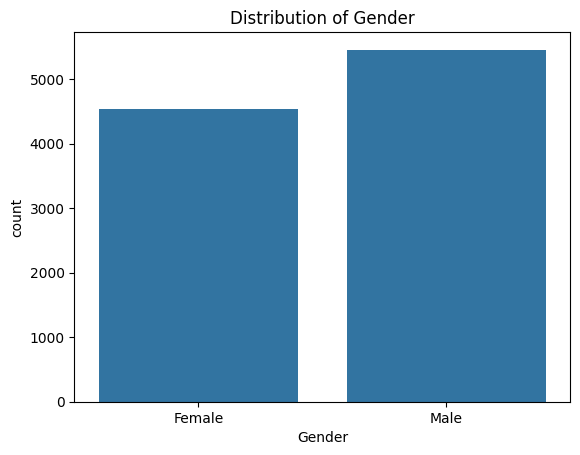

In [ ]:
sns.countplot(x='Gender', data=churn_df)
plt.title('Distribution of Gender')
plt.show()

This chart, we can see that the number of males in the dataset is a little higher than that of females, meaning a slight imbalance in gender representation.

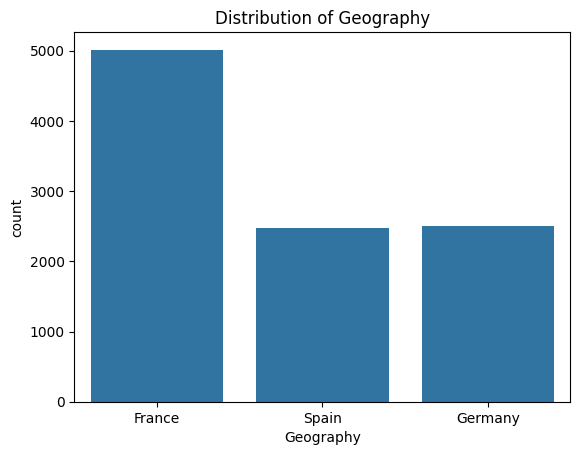

In [ ]:
sns.countplot(x='Geography', data=churn_df)
plt.title('Distribution of Geography')
plt.show()

This chart represents the distribution of entries across three countries: France, Spain, and Germany. The country best represented in this dataset is France, with about 5,000 entries, followed by Spain and Germany.

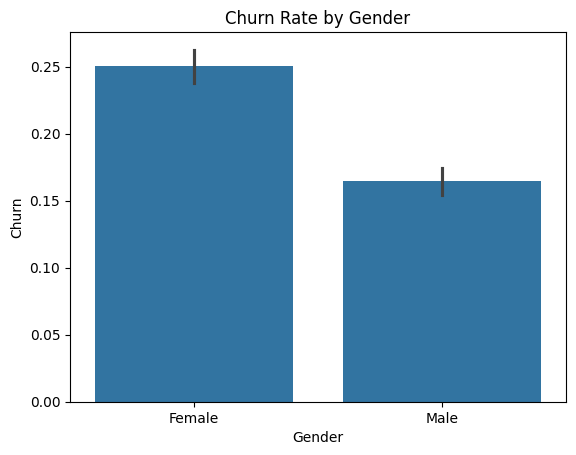

In [ ]:
sns.barplot(x='Gender', y='Churn', data=churn_df)
plt.title('Churn Rate by Gender')
plt.show()

here the female has a relatively higher churn rate than the male, therefore from this dataset, females are more likely to churn compared to males.

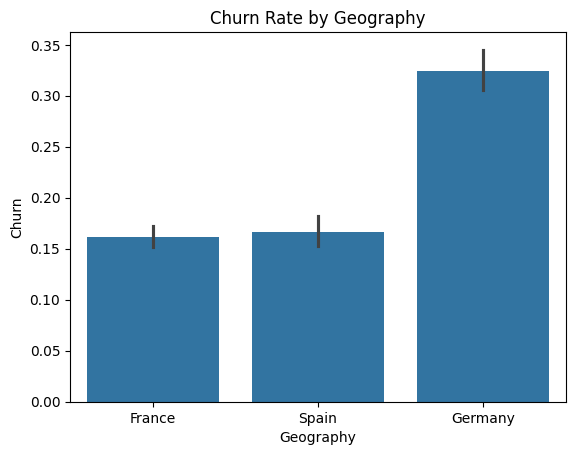

In [ ]:
sns.barplot(x='Geography', y='Churn', data=churn_df)
plt.title('Churn Rate by Geography')
plt.show()

Here we can see that Germany has the highest churning rate, suggesting customers in this region are most likely to leave than either France or Spain.

####Numerical Attributes

In [ ]:
numerical_cols = churn_df.select_dtypes(include=['int64', 'float64']).columns.drop('Churn')
print("Numerical Columns (excluding Churn):", numerical_cols)

Numerical Columns (excluding Churn): Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


Here we created a list that has all the numerical attributes to analyze them

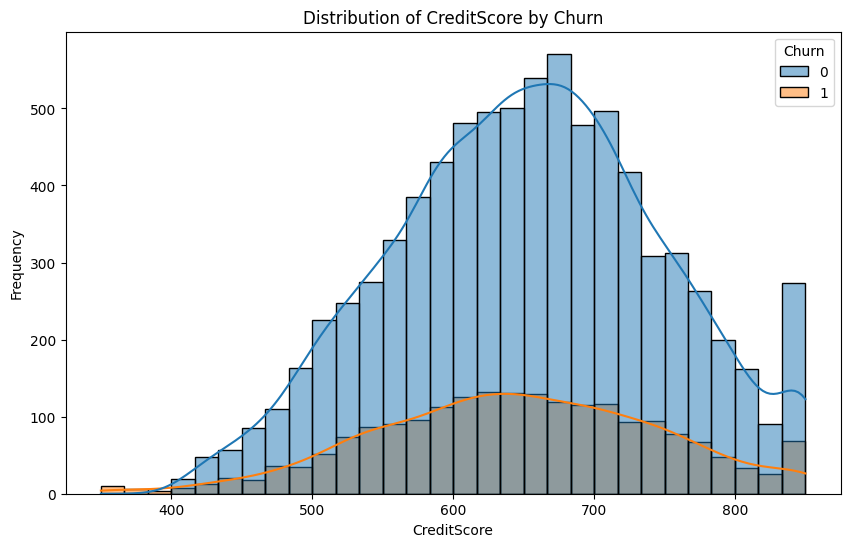

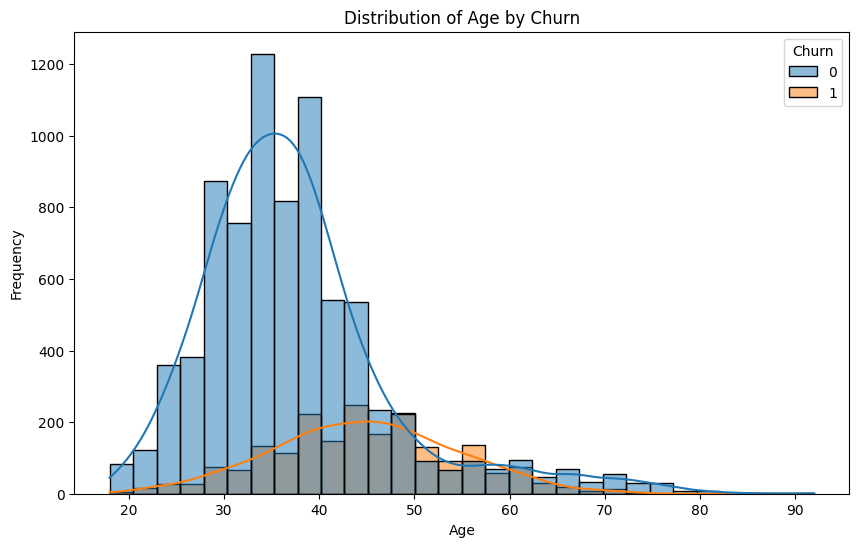

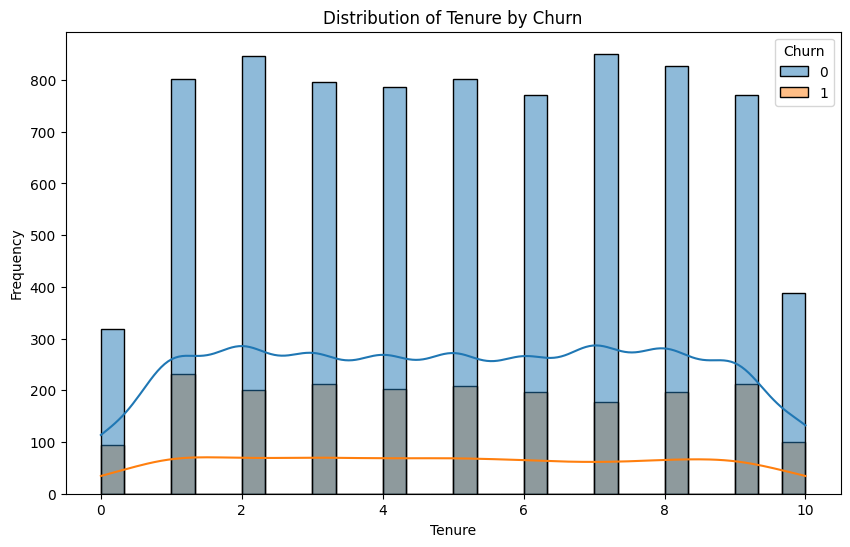

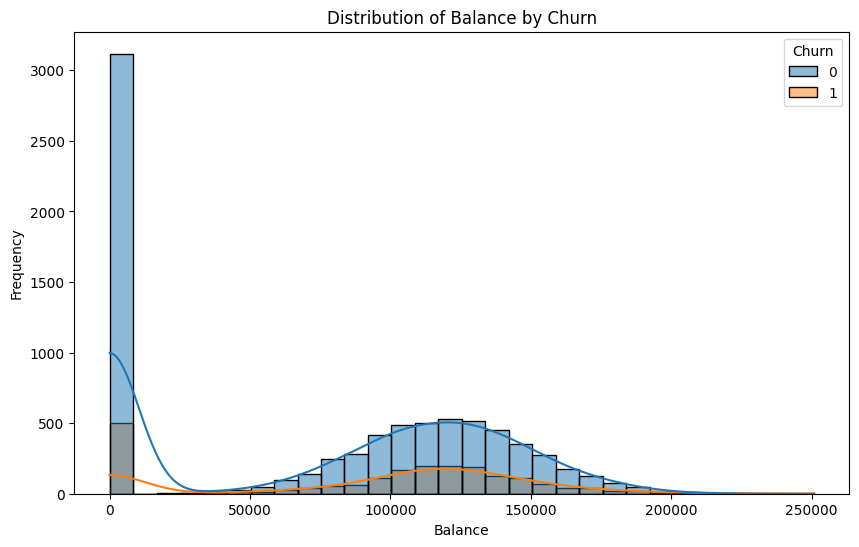

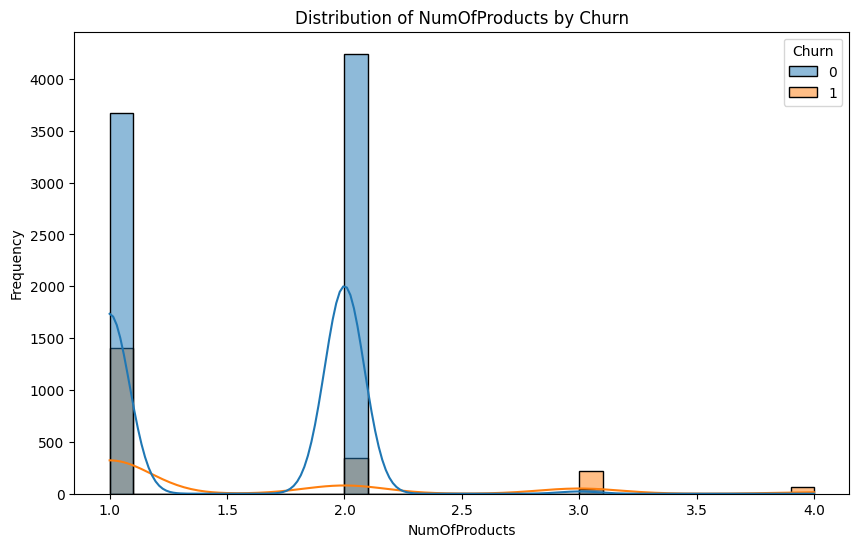

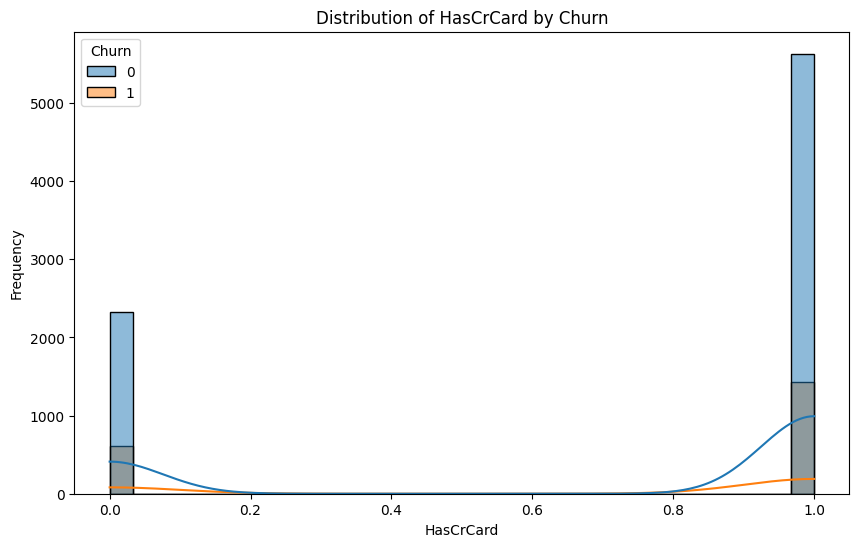

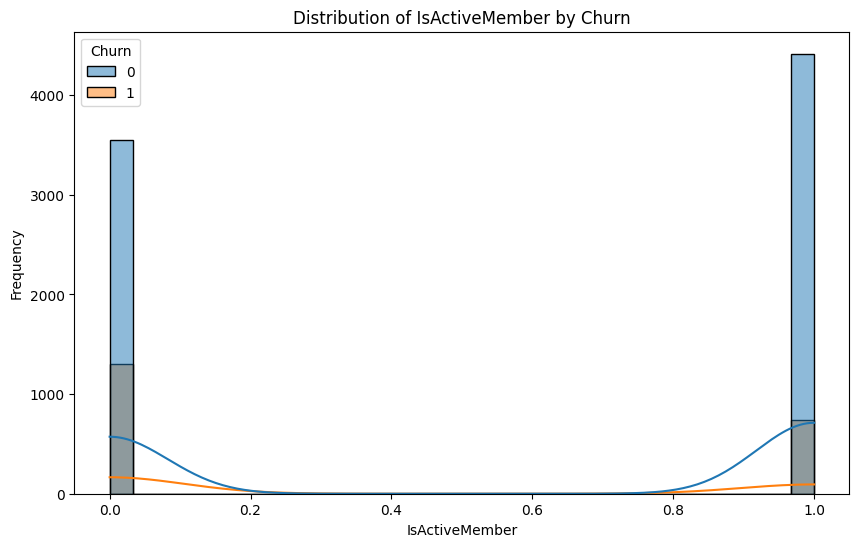

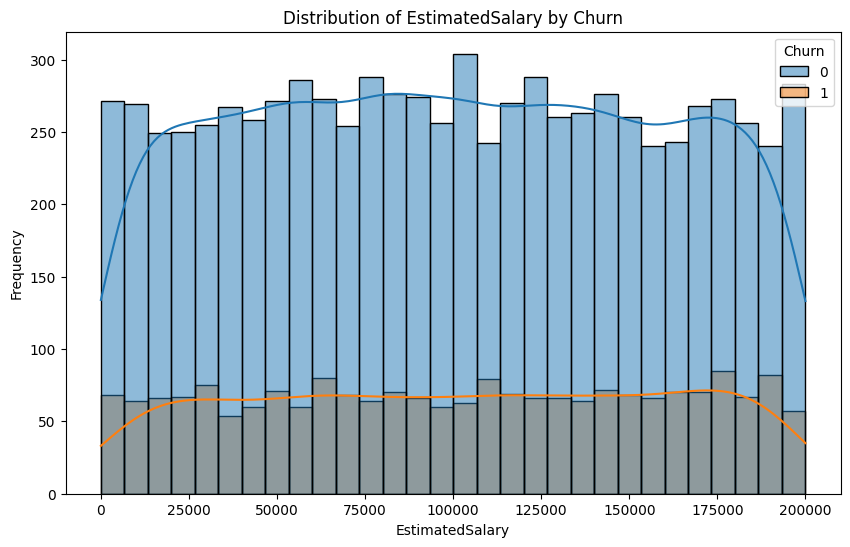

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=churn_df, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f'Distribution of {col} by Churn')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

These distributions are very informative about the factors that explain customer churn. T

he distribution of CreditScore indicates that customers with poor credit scores are more likely to churn, while non-churned customers are across a wider range of scores but peak around 700.

It also seems that there is a big difference in the factor of age, as churned customers are older between 50–60 years and non-churned customers are younger, peaking in the 30–40 age range.

The distribution of Tenure does not indicate any clear pattern in that the churned customers are uniformly distributed across all tenures.

In Balance, the non-churned customers mostly have zero balances, and the churned customers lie across higher balances, which could suggest a relation between higher balances and churn.

The distribution of NumOfProducts shows that customers with one product are more likely to churn, and though few customers have three or four products, the ones who do show a higher churn rate.

HasCrCard has very little impact as the churn rates for customers with and without credit cards are almost similar.

However, IsActiveMember shows that the non-active members are much more likely to churn than active members, and therefore customer engagement is important in retention.

Lastly, EstimatedSalary seems to be well distributed across both churned and non-churned customers, indicating that salary is not a strong predictor of churn.

####Target Attribute

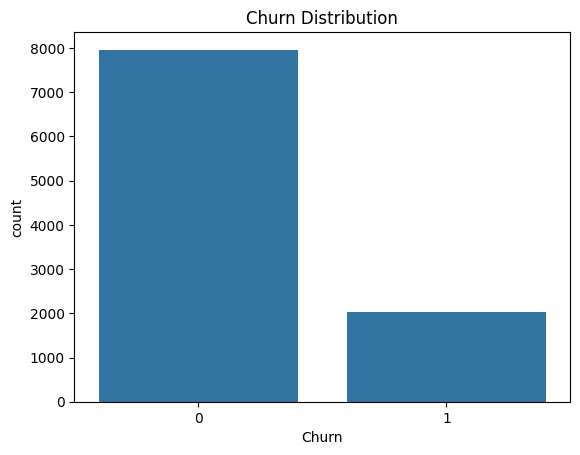

Churn Distribution (%):
 Churn
0    79.63
1    20.37
Name: proportion, dtype: float64


In [ ]:
sns.countplot(x='Churn', data=churn_df)
plt.title('Churn Distribution')
plt.show()
churn_percent = churn_df['Churn'].value_counts(normalize=True) * 100
print("Churn Distribution (%):\n", churn_percent)

The churn distribution chart reflects that the major share of customers in this dataset did not churn. Precisely, it can be seen that 79.63% of customers retained their services, while 20.37% customers churned. This presents a serious case of class imbalance, whereby the number of non-churned customers far exceeds the number of churned customers.

###Data Preparation for Modeling

In [ ]:
df = pd.get_dummies(churn_df,columns=['Geography','Gender'],drop_first=True,dtype=int)

Here we do one-hot encoding for the categorical attributes

In [ ]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


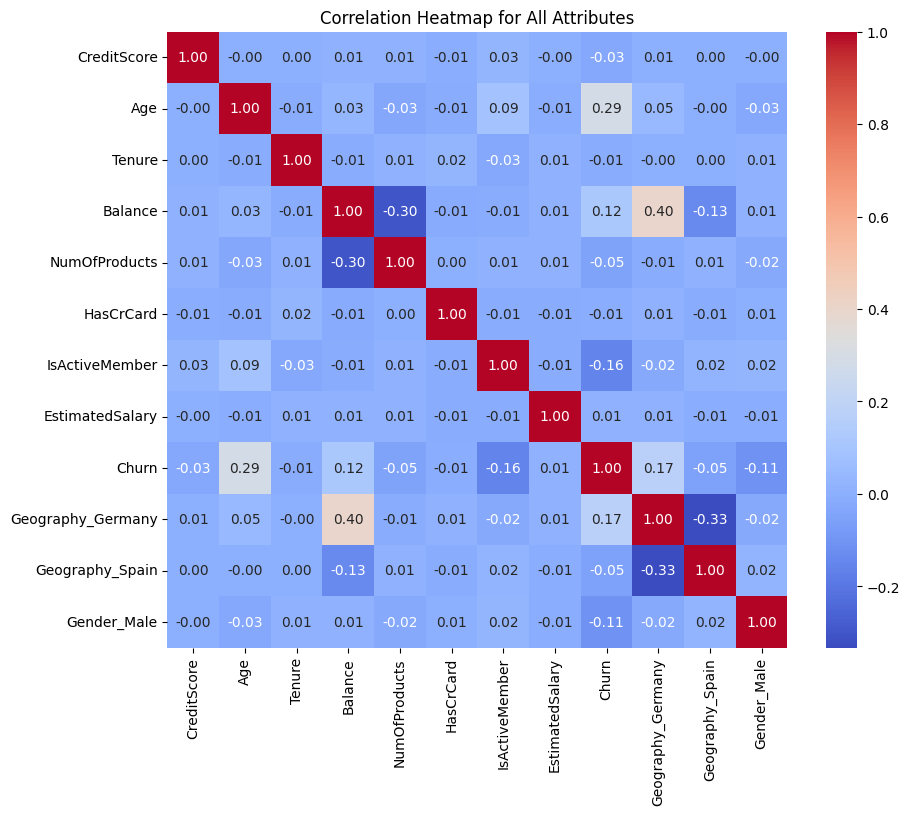

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap for All Attributes')
plt.show()

The correlation heatmap visualizes the relationship between all attributes in the dataset. The diagonal values are 1, which means each variable perfectly correlates with itself. The most relevant correlations are a moderate positive relation of Age with Churn of 0.29, indicating older customers are more likely to churn. While balance is weakly positive (0.40) and little positive (0.12) with regard to the geodemographic variables for Germany, other variables like NumOfProducts, HasCrCard, and EstimatedSalary are unimportant as far as the Pearson coefficients suggest the direct relationship between all the pairs of variables mentioned in column Churn. This follows that higher balances are somewhat indicative of a customer likely to churn out, especially from Germany. Then IsActiveMember also had a rather weak negative association (-0.16) with Churn-the active members were less expected to churn. There is some inter-correlation within the geographic features; for instance, Geography_Germany and Geography_Spain have an expected negative correlation of -0.33 because they are mutually exclusive.

In [ ]:
X = df.drop("Churn",axis=1)
y = df['Churn']
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

Here, we start by identifying our target column 'churn' and then we split the data into training (80%) and testing (20%) and finally we used a standard scaler to normalize the data to ensure data are on the same scale because if not it will affect model performance by ensuring the model is trained and tested on data with same scales.

###Modeling

In [ ]:
model = Sequential([
    Input(shape=(11,)),
    Dense(11, activation="relu"),
    Dense(5, activation="relu"),
    Dense(1, activation="sigmoid")
],
    name="churn_prediction_model")

model.summary()

model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

Model: "churn_prediction_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 198 (792.00 B)

 Trainable params: 198 (792.00 B)

 Non-trainable params: 0 (0.00 B)

Here, we created a feedforward neural network, where it takes 11 attributes of the data set as input and has 2 hidden layers one that has 11 neurons and uses relu as an activation function and another that uses relu as well but has 5 neurons only. Finally, there is an output layer that has just one layer and uses the sigmoid function which is ideal for binary predcition.

Then, a simple architecture of the model is displayed that shows the layer's names, output shapes, and parameters that are trainable.

Then we configured the model for training by using the Adam optimizer that simply controls how the model learns by adjusting the weights of the neurons.

For the loss function, it is "binary_crossentropy", this is used since our target attribute has only 2 possible values, 1 -> churn, 0 -> no churn. It simply tells the model how wrong the model's predictions (errors) are compared to the actual values of churn. We aim to minimize this loss.

Finally, we command the model to calculate accuracy during training to help track performance.

###Evaluation

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)
model.layers[0].get_weights()
y_log = model.predict(X_test_scaled)
y_pred = np.where(y_log<0.5,0,1)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7700 - loss: 0.5644 - val_accuracy: 0.7919 - val_loss: 0.4872
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7999 - loss: 0.4705 - val_accuracy: 0.8000 - val_loss: 0.4533
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8011 - loss: 0.4532 - val_accuracy: 0.8019 - val_loss: 0.4379
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8080 - loss: 0.4383 - val_accuracy: 0.8056 - val_loss: 0.4312
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8157 - loss: 0.4245 - val_accuracy: 0.8087 - val_loss: 0.4270
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8225 - loss: 0.4057 - val_accuracy: 0.8112 - val_loss: 0.4242
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8131 - loss: 0.4270 - val_accuracy: 0.8125 - val_loss: 0.4199
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8153 - loss: 0.4305 - val_accu

The model was trained for 100 epochs with 20% validation split. The accuracy improved from 53.15% in Epoch 1 to 86.23% in Epoch 100, while the loss decreased from 0.7228 to 0.3240, indicating effective learning. Validation accuracy also increased from 79.12% to 86.50%, showing good generalization. The final test accuracy was 85.35%, but recall for churn was low due to class imbalance.

Predictions were made using the 0.5 threshold, and the results showed consistent improvement in model performance across epochs.

In [ ]:
accuracy_score(y_test,y_pred)

0.86

This line calculates the accuracy of the model on the test set by comparing the predicted values (y_pred) with the true labels (y_test). The accuracy score reflects the percentage of correct predictions made by the model.



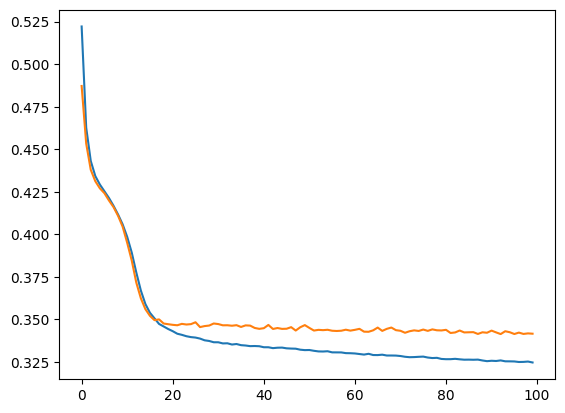

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

The plotted training and validation loss curves present the model's performance over 100 epochs. It is apparent that the training loss-the blue line-shows a monotonically decreasing trend during training, with the model learning the provided data quite well. Correspondingly, the validation loss is seen to go down at first and then to a very stable point; therefore, the model generalizes well enough on unseen data.

The close alignment of the training and validation loss curves is indicative that the model doesn't suffer from significant overfitting or underfitting. However, a slight gap between the two curves toward the end suggests some minor overfitting, as the training loss is slightly lower than the validation loss.

In [ ]:
report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    No Churn       0.88      0.95      0.92      1586
       Churn       0.74      0.50      0.60       414

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



The classification report shows that the model performs well in predicting No Churn customers, with a precision of 0.87, recall of 0.96, and F1-score of 0.91. However, for Churn, the model's performance is weaker, with a precision of 0.76, recall of 0.43, and F1-score of 0.55, indicating that it misses a significant number of churned customers. The overall accuracy is 85%, but this is misleading due to class imbalance.

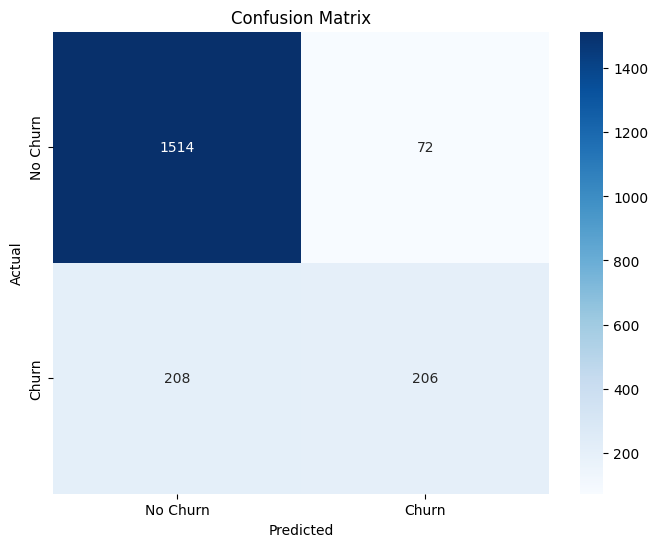

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


The confusion matrix illustrates the performance of the model in classifying customer churn. It has correctly predicted 178 examples as "Churn" and 1529 instances as "No Churn," whereas it mislabeled 57 instances as "Churn" that were "No Churn" and 236 instances as "No Churn" when they actually were "Churn." The model's performance for "No Churn" cases is good, although less for "Churn".

###Conlusions and Recommendations

As depicted from the higher number of false negatives, it simply did not catch as many customers that actually churned. This is due to influence of class balance, which in the original data, had "Churn" instances of about 20%. The "Churn" classification rate could be improved further, either by oversampling from the minority class or considering class weights, especially in algorithms that allow classes with different weights or with algorithm techniques that handle these situations, more suggestions are mentioned in the report.

Overall, for the majority class, performance is very good, with scope for improvement in a few aspects regarding the minority class.